In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
import matplotlib.pyplot as plt

import mlflow
import mlflow.sklearn

Matplotlib is building the font cache; this may take a moment.


In [3]:
credito = pd.read_csv('Credit.csv')
credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [4]:
credito.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,0<=X<200,30,'critical/other existing credit','new car',5234,<100,unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


In [5]:
for col in credito.columns:
    if credito[col].dtype == 'object':
        credito[col] = credito[col].astype('category').cat.codes

In [6]:
credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,3,5,1736,3,1,3,0,2,...,2,31,1,1,1,2,1,0,1,1
996,2,30,3,2,3857,3,0,4,1,2,...,0,40,1,1,1,0,1,1,1,1
997,0,12,3,7,804,3,3,4,3,2,...,3,38,1,1,1,3,1,0,1,1
998,2,45,3,7,1845,3,0,4,3,2,...,1,23,1,0,1,3,1,1,1,0


In [7]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [9]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,classe, test_size=0.3,random_state=42)

Modelo salvo:  69c89aee205a40b9b001d51b6c920f6c


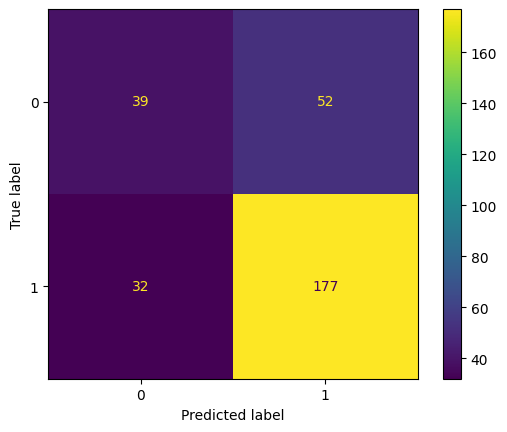

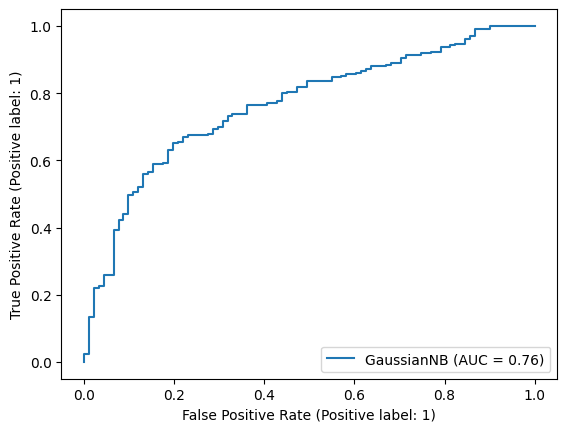

In [11]:


mlflow.set_experiment("nbexperimento")

with mlflow.start_run():
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_treinamento, y_treinamento)
    previsoes = naive_bayes.predict(X_teste)
    
    acuracia = accuracy_score(y_teste, previsoes)
    recall = recall_score(y_teste, previsoes)
    precision = precision_score(y_teste, previsoes)
    f1 = f1_score(y_teste, previsoes)
    auc = roc_auc_score(y_teste, naive_bayes.predict_proba(X_teste)[:, 1])  # Ajuste aqui
    log = log_loss(y_teste, naive_bayes.predict_proba(X_teste))  # Log loss precisa de probabilidades
   
    mlflow.log_metric("acuracia", acuracia)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("auc", auc)
    mlflow.log_metric("log", log)

    disp = ConfusionMatrixDisplay.from_estimator(naive_bayes, X_teste, y_teste)
    disp.figure_.savefig("confusion.png")
    
    roc_disp = RocCurveDisplay.from_estimator(naive_bayes, X_teste, y_teste)
    roc_disp.figure_.savefig("roc.png")

    mlflow.log_artifact("confusion.png")
    mlflow.log_artifact("roc.png")   

    mlflow.sklearn.log_model(naive_bayes, "ModeloNB")
    
    print("Modelo salvo: ", mlflow.active_run().info.run_uuid)    

mlflow.end_run()
